# <font color="#5fa8d3"> Check Photos

## <font color="#62b6cb"> 0. Libraries Importation & Funtions Definition

**Libraries Importation**

In [24]:
import json # to import jsons
import pandas as pd # to manipulate datasets
import numpy as np # to perform numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting nicer
from scipy.stats import gamma
import yaml # for importing a yaml file
from src.mymodule import * # for importing our functions

**Configuration Variables**

In [25]:
# Load the YAML file
with open('..\config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Function to set variables globally and store their names
def set_variables(config, prefix='', var_dict={}):
    for key, value in config.items():
        if isinstance(value, dict):
            set_variables(value, prefix + key + '_', var_dict)
        else:
            globals()[prefix + key] = value
            var_dict[prefix + key] = value
    return var_dict

# Set variables globally and get a dictionary of the set variables
set_vars = set_variables(config)

# Print all the variables that were set
print("Variables set from YAML file:")
for var_name, var_value in set_vars.items():
    print(f"{var_name}: {var_value}")

Variables set from YAML file:
seed: 123
train_annotations_json: annotations.json
train_path_original: ..\archive\image\image


## <font color="#62b6cb"> 1. Photo Checker

**Classes explanation**

* mat_bo_phan=lost parts (Miscellaneous Damage)
* rach=torn (Metal damage tear)
* mop_lom=dented (Metal damage dent)
* tray_son=paint scratches (Metal damage scratches)
* thung=puncture (Miscellaneous Damage)
* vo_kinh=broken glass (Glass damage crack)
* be_den= broken lamp (Miscellaneous Damage)

**New Classes explanation**

* mis_lost = lost parts (Miscellaneous Damage)
* met_tear = torn (Metal damage tear)
* met_scratch = paint scratches (Metal damage scratches)
* glass_crack = broken glass (Glass damage crack)
* mis_punct = puncture (Miscellaneous Damage)
* mis_lamp = broken lamp (Miscellaneous Damage)
* met_dent_minor = dented (Metal damage dent) - minor damage
* met_dent_medium = dented (Metal damage dent) - medium damage
* met_dent_severe = dented (Metal damage dent) - severe damage

In [26]:
# read JSON
with open(os.path.join(train_path_original, train_annotations_json  ), "r") as f:
    coco_data = json.load(f)

In [27]:
# we extract images with this damage type
class_name="mis_lost"
data_class = extract_coco_data(coco_data, class_name)

In [38]:
data_class.keys()

dict_keys(['01012020_172204image853193.jpg', '01012020_172204image891741.jpg', '01012020_172251image12370.jpg', '01022020_083952image768902.jpg', '01022020_102909image891067.jpg', '01022020_102910image826484.jpg', '01022020_102915image195873.jpg', '01022020_103924image583913.jpg', '01022020_153346image398811.jpg', '01022021_152725image672832.jpg', '01022021_152729image798820.jpg', '01022021_152737image952852.jpg', '01022021_152754image439994.jpg', '01022021_152758image967897.jpg', '01102020_084614image405851.jpg', '01102020_101603image435142.jpg', '01102020_101654image809221.jpg', '01102020_123305image779287.jpg', '01102020_143743image431850.jpg', '01102020_143840image178149.jpg', '01102020_143937image848597.jpg', '01122020_092600image50301.jpg', '02012020_081542image548096.jpg', '02012020_085743image835094.jpg', '02012020_091526image326114.jpg', '02012020_091654image285939.jpg', '02012020_092654image118041.jpg', '02012020_092654image334773.jpg', '02012020_093521image578880.jpg', '0201

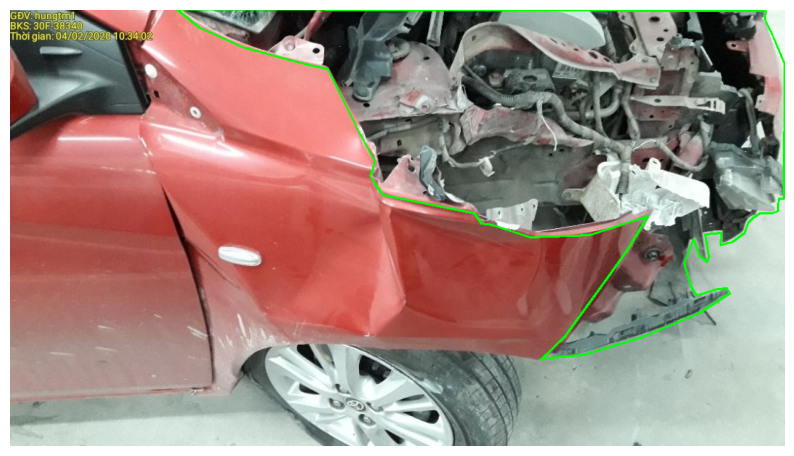

In [42]:
plot_photo_df(train_path_original,'04022020_103415image767642.jpg', data_class)